<a href="https://colab.research.google.com/github/Tsaakshi/ML/blob/main/23070241044_Assignment_1_HouseholdPrediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><b>Household Prediction</b></h2>
<h4><b>Saakshi Tomar</b></h4>
23070241029
<br>
<br><br>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [32]:
dataset=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [33]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [34]:
dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [35]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [36]:
dataset.shape

(17000, 9)

In [76]:
dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [38]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [39]:
X=dataset.iloc[:,2:8]

In [40]:
Y=dataset.median_house_value

In [41]:
X.shape

(17000, 6)

In [42]:
Y.shape

(17000,)

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [44]:
xtrain.shape

(11900, 6)

In [45]:
ytrain.shape

(11900,)

In [46]:
xtest.shape

(5100, 6)

In [47]:
xtrain.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9173,12.0,2721.0,549.0,1294.0,523.0,2.5575
16528,27.0,1446.0,329.0,594.0,255.0,1.1650
4819,33.0,1976.0,404.0,1379.0,395.0,3.8542
6818,20.0,1782.0,896.0,1749.0,823.0,2.2094
7717,16.0,4814.0,1381.0,1897.0,1209.0,3.3725


In [48]:
xtrain=StandardScaler().fit_transform(xtrain)

In [49]:
xtest=StandardScaler().fit_transform(xtest)

In [50]:
xtrain.shape

(11900, 6)

In [51]:
model=LinearRegression().fit(xtrain,ytrain)

In [52]:
y_predict=model.predict(xtest)

In [63]:
r2= r2_score(ytest,y_predict)

In [65]:
mse = mean_squared_error(ytest,y_predict)

In [66]:
mae = mean_absolute_error(ytest,y_predict)

R-squared: 0.582
Mean Squared Error: 5776798490.967
Mean Absolute Error: 55742.473


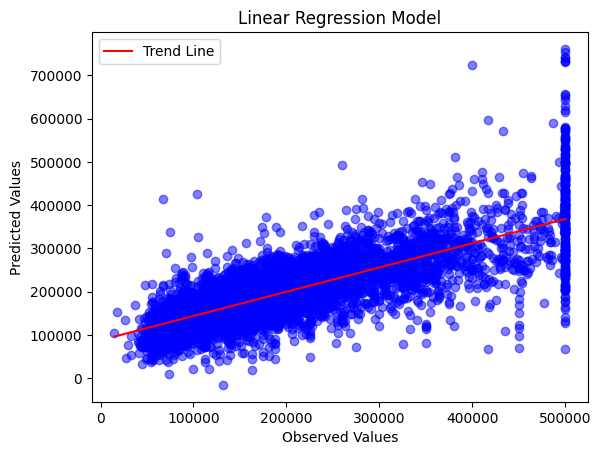

In [75]:
plt.scatter(ytest, y_predict, alpha= 0.5, color = "blue")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')

trend_x = np.linspace(min(ytest), max(ytest), 100)
trend_y = np.poly1d(np.polyfit(ytest, y_predict, 1))(trend_x)
plt.plot(trend_x, trend_y, color='red', label='Trend Line')

print(f'R-squared: {r2:.3f}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'Mean Absolute Error: {mae:.3f}')

plt.legend()
plt.show()
